<a href="https://colab.research.google.com/github.com/r-ap/Final-Project-Training/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

## Introduction

Creator : Ryan Arief Putranto - 010497

Project ini untuk membuat model Prediksi terkait Turn Over Karyawan berdasarkan beberapa parameter:
- Sumber data : https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction
- Data dari 3 Kota di India (New Delhi, Pune, dan Bangalore)
- Data hanya dari tahun 2012 - 2018

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Data Loading And Cleaning

Berdasarkan data diatas parameter data yang ada sebagai berikut:

- Education : The highest level of formal education obtianed by the employee
- JoiningYear : Year of joining the company
- City : Job Location
- PaymentTier : [1:3] -> 1 means better payment
- Age : Age of the employee
- Gender : Gender of the employee
- EverBenched : Ever kept out of project for more than one month
- ExperienceInCurrentDomain : Experience in current field
- LeaveOrNot : Whether the employee leaves the company in next 2 years

In [11]:
df_employee = pd.read_csv('content/Employee.csv')
df_employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [12]:
df_employee.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [13]:
df_employee['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [14]:
df_employee['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [15]:
df_employee['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df_employee['EverBenched'].unique()

array(['No', 'Yes'], dtype=object)

Lakukan Mapping sebagai berikut:
- Education : 1 = 'Bachelors' ; 2 = 'Masters' ; 3 ='PHD'
- City : 1 = 'Bangalore' ; 2 = 'Pune' ; 3 = 'New Delhi'
- Gender : 1 = 'Male' ; 2 = 'Female'
- EverBenched : 0 = 'No' ; 1 = 'Yes'

In [17]:
# Function untuk grouping feature menjadi nilai int 
def grouping_feature(df, variable, dict):
   for ind in df.index:
      dic_name = df[variable][ind]
      if dic_name == np.NaN:
         df_employee[variable][ind] = 0    
      else:   
         df_employee[variable][ind] = int(dict[dic_name])

In [18]:
dict_education ={
    'Bachelors' : 1, 'Masters' : 2, 'PHD' : 3
} 

dict_city ={
    'Bangalore' : 1, 'Pune' : 2, 'New Delhi' : 3
} 

dict_gender ={
    'Male' : 1, 'Female' : 2
}

dict_everbenched = {
    'No' : 0, 'Yes' : 1  
}



In [19]:
grouping_feature(df_employee, 'Education',dict_education)
grouping_feature(df_employee, 'City',dict_city)
grouping_feature(df_employee, 'Gender',dict_gender)
grouping_feature(df_employee, 'EverBenched',dict_everbenched)



C:\Users\010497\AppData\Local\Temp/ipykernel_620/2291873335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employee[variable][ind] = int(dict[dic_name])


Lakukan pengecekan apakah masih ada data yang null

In [20]:
df_employee.isnull().any()

Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool

Ubah semua tipe data menjadi Integer atau Float

In [21]:

df_employee = df_employee.astype({"Education": int,"City": int,"Gender": int,"EverBenched": int})

In [22]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int32
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int32
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int32
 6   EverBenched                4653 non-null   int32
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 254.6 KB


## Exploring Data Analysis

Coba melakukan analisa Data:
- Melihat masing-masing feature terhadap output 'LeaveOrNot'
- Melihat Corelasi dari masing-masing feature

Education


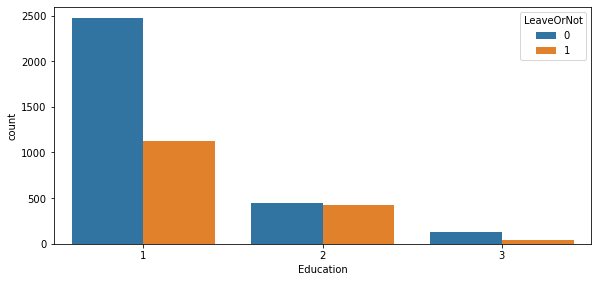

JoiningYear


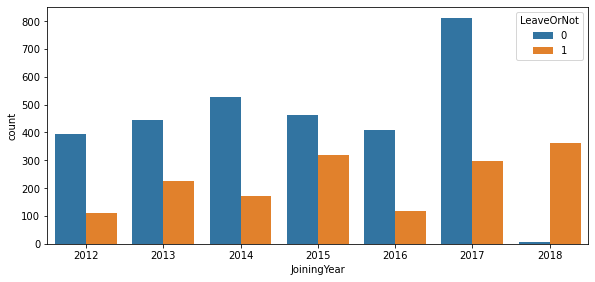

City


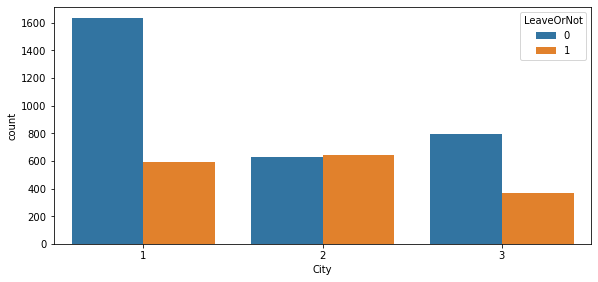

PaymentTier


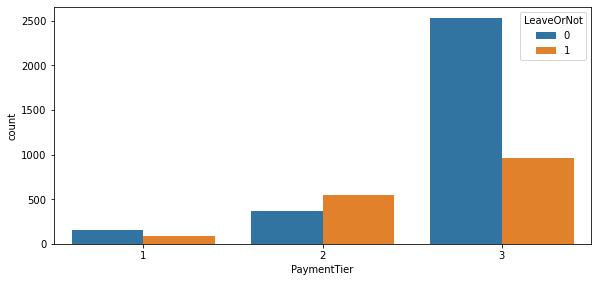

Age


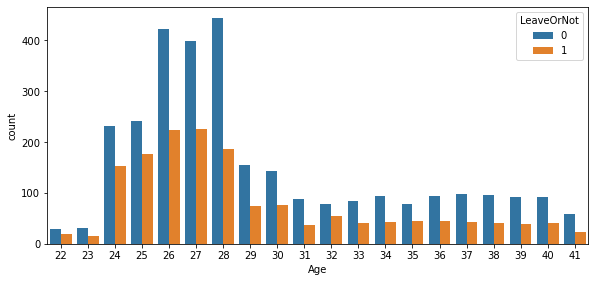

Gender


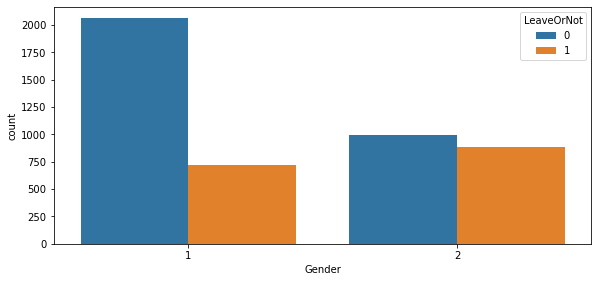

EverBenched


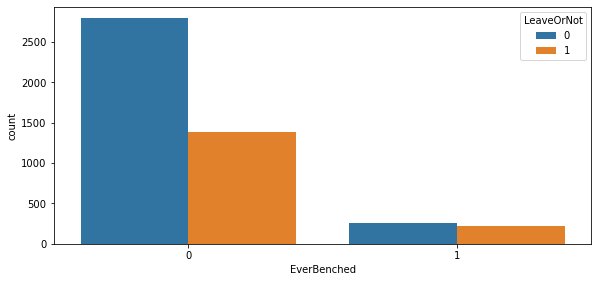

ExperienceInCurrentDomain


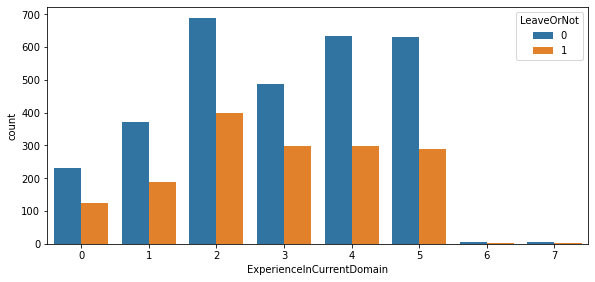

In [23]:

for index,column in enumerate(df_employee):
    if column != 'LeaveOrNot':
        print(column)
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        sns.countplot(data=df_employee,x=column,hue = df_employee.LeaveOrNot)
        plt.tight_layout(pad = 1.0)
        plt.show()
    

Melihat porsi atau percentage output `LeaveOrNot` pada masing masing featurer

In [24]:
def diagnostic_tables(df, column):
    df_yn = df.groupby([column,'LeaveOrNot']).size().reset_index(name='count')
    df_yn_total = df_yn.groupby([column]).sum()[['count']].reset_index() 
    df_yn['Percent Of Sub Total']  = df_yn['count']
    df_yn['Percent Of Sub Total'] = df_yn['Percent Of Sub Total'].astype(float)
    df_yn['Percent Of Total'] = ((df_yn['count'] / df_yn['count'].sum())*100).round(2)
    for index, row in df_yn.iterrows():
        df_yn.at[index,'Percent Of Sub Total'] = (df_yn.at[index,'count'] / df_yn_total['count'][df_yn_total[column] == row[column]] * 100).round(2)

    df_yn = df_yn.set_index([column, 'LeaveOrNot'])    
    return df_yn

In [25]:
df_education = diagnostic_tables(df_employee,'Education')
df_education

count  Percent Of Sub Total  Percent Of Total
Education LeaveOrNot                                               
1         0            2472                 68.65             53.13
          1            1129                 31.35             24.26
2         0             447                 51.20              9.61
          1             426                 48.80              9.16
3         0             134                 74.86              2.88
          1              45                 25.14              0.97

In [26]:
df_joiningyear = diagnostic_tables(df_employee,'JoiningYear')
df_joiningyear

count  Percent Of Sub Total  Percent Of Total
JoiningYear LeaveOrNot                                               
2012        0             395                 78.37              8.49
            1             109                 21.63              2.34
2013        0             445                 66.52              9.56
            1             224                 33.48              4.81
2014        0             526                 75.25             11.30
            1             173                 24.75              3.72
2015        0             463                 59.28              9.95
            1             318                 40.72              6.83
2016        0             408                 77.71              8.77
            1             117                 22.29              2.51
2017        0             811                 73.19             17.43
            1             297                 26.81              6.38
2018        0               5                  1.36              0.11
            1             362                 98.64              7.78

In [27]:
df_city = diagnostic_tables(df_employee,'City')
df_city

count  Percent Of Sub Total  Percent Of Total
City LeaveOrNot                                               
1    0            1633                 73.29             35.10
     1             595                 26.71             12.79
2    0             629                 49.61             13.52
     1             639                 50.39             13.73
3    0             791                 68.37             17.00
     1             366                 31.63              7.87

In [28]:
df_paymenttier = diagnostic_tables(df_employee,'PaymentTier')
df_paymenttier

count  Percent Of Sub Total  Percent Of Total
PaymentTier LeaveOrNot                                               
1           0             154                 63.37              3.31
            1              89                 36.63              1.91
2           0             368                 40.09              7.91
            1             550                 59.91             11.82
3           0            2531                 72.48             54.40
            1             961                 27.52             20.65

In [29]:
df_age = diagnostic_tables(df_employee,'Age')
df_age

count  Percent Of Sub Total  Percent Of Total
Age LeaveOrNot                                               
22  0              30                 61.22              0.64
    1              19                 38.78              0.41
23  0              32                 66.67              0.69
    1              16                 33.33              0.34
24  0             232                 60.26              4.99
    1             153                 39.74              3.29
25  0             242                 57.89              5.20
    1             176                 42.11              3.78
26  0             422                 65.43              9.07
    1             223                 34.57              4.79
27  0             399                 63.84              8.58
    1             226                 36.16              4.86
28  0             444                 70.48              9.54
    1             186                 29.52              4.00
29  0             155                 67.39              3.33
    1              75                 32.61              1.61
30  0             143                 65.00              3.07
    1              77                 35.00              1.65
31  0              88                 70.40              1.89
    1              37                 29.60              0.80
32  0              78                 59.09              1.68
    1              54                 40.91              1.16
33  0              84                 67.74              1.81
    1              40                 32.26              0.86
34  0              94                 69.12              2.02
    1              42                 30.88              0.90
35  0              78                 63.41              1.68
    1              45                 36.59              0.97
36  0              94                 67.63              2.02
    1              45                 32.37              0.97
37  0              98                 69.50              2.11
    1              43                 30.50              0.92
38  0              96                 70.59              2.06
    1              40                 29.41              0.86
39  0              92                 70.23              1.98
    1              39                 29.77              0.84
40  0              93                 69.40              2.00
    1              41                 30.60              0.88
41  0              59                 71.95              1.27
    1              23                 28.05              0.49

In [30]:
df_gender = diagnostic_tables(df_employee,'Gender')
df_gender

count  Percent Of Sub Total  Percent Of Total
Gender LeaveOrNot                                               
1      0            2062                 74.23             44.32
       1             716                 25.77             15.39
2      0             991                 52.85             21.30
       1             884                 47.15             19.00

In [31]:
df_everbenched = diagnostic_tables(df_employee,'EverBenched')
df_everbenched

count  Percent Of Sub Total  Percent Of Total
EverBenched LeaveOrNot                                               
0           0            2792                 66.87             60.00
            1            1383                 33.13             29.72
1           0             261                 54.60              5.61
            1             217                 45.40              4.66

In [32]:
df_exp = diagnostic_tables(df_employee,'ExperienceInCurrentDomain')
df_exp

count  Percent Of Sub Total  \
ExperienceInCurrentDomain LeaveOrNot                                
0                         0             231                 65.07   
                          1             124                 34.93   
1                         0             370                 66.31   
                          1             188                 33.69   
2                         0             688                 63.29   
                          1             399                 36.71   
3                         0             487                 61.96   
                          1             299                 38.04   
4                         0             634                 68.10   
                          1             297                 31.90   
5                         0             631                 68.66   
                          1             288                 31.34   
6                         0               6                 75.00   
                          1               2                 25.00   
7                         0               6                 66.67   
                          1               3                 33.33   

                                      Percent Of Total  
ExperienceInCurrentDomain LeaveOrNot                    
0                         0                       4.96  
                          1                       2.66  
1                         0                       7.95  
                          1                       4.04  
2                         0                      14.79  
                          1                       8.58  
3                         0                      10.47  
                          1                       6.43  
4                         0                      13.63  
                          1                       6.38  
5                         0                      13.56  
                          1                       6.19  
6                         0                       0.13  
                          1                       0.04  
7                         0                       0.13  
                          1                       0.06

<AxesSubplot:>

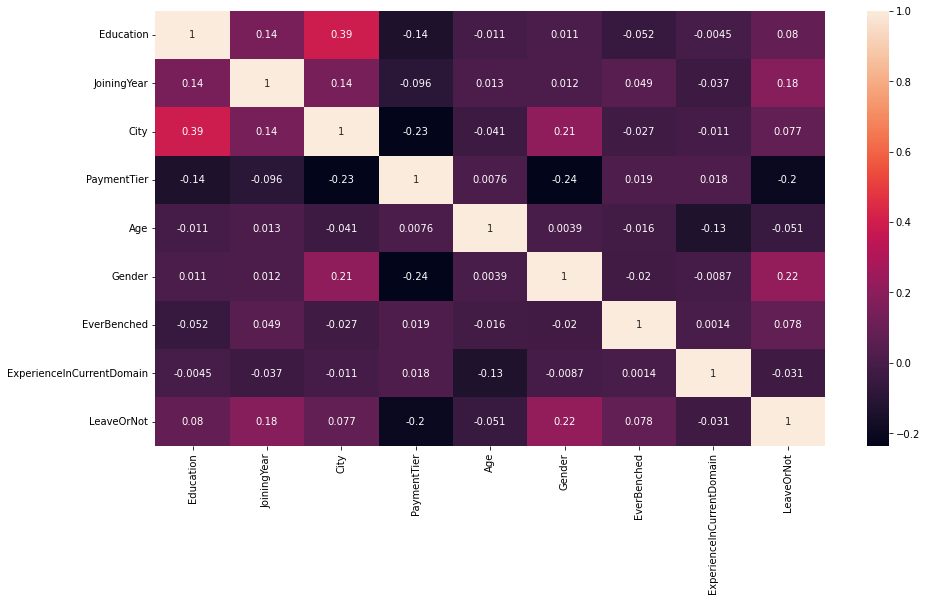

In [33]:
correlation = df_employee.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation,annot=True)

Key Observations

- 49% of master degree holders left
- 99% of people joined in 2018 left
- 60% of people with PaymentTier as 2 left
- 40% of people with age between 24, 25, 32 left
- 47% of female employees left
- 45% of people who were ever Benched left

Lakukan pemisahan data untuk Data Train dan Data Test

## Data Processing

Dikarenakan data cukup ready untuk digunakan proses pemodelan Machine Learning tidak banyak dilakukan Processing Data

## Sampling And Resampling

In [34]:
X = df_employee.drop(columns='LeaveOrNot')
y = df_employee['LeaveOrNot']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, stratify=y)

<AxesSubplot:>

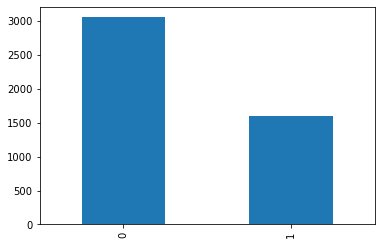

In [36]:
y.value_counts().plot(kind='bar')

<AxesSubplot:>

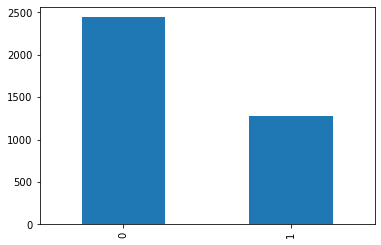

In [37]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

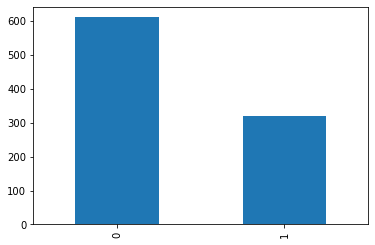

In [38]:
y_test.value_counts().plot(kind='bar')


Lakukan Resimpling agar data train mempunyai jumlah output (data `LevaeOrNot`) Yes or No seimbang. Bisa menggunakan pendekatan dibawah ini:
- Undersample
- Oversample (SMOTE)

In [39]:
y_train_0 = y_train[y_train==0]
y_train_1 = y_train[y_train==1]

y_train_0_sample = y_train_0.sample(len(y_train_1))
y_train_sample = pd.concat([y_train_0_sample,y_train_1]).sample(2*len(y_train_1))
y_train_sample

1290    1
1797    1
4296    0
829     0
3531    0
       ..
4280    1
3136    0
2595    0
3296    0
826     0
Name: LeaveOrNot, Length: 2560, dtype: int64

In [40]:
X_train_sample = X_train.loc[y_train_sample.index]

<AxesSubplot:>

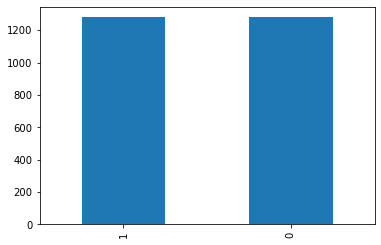

In [41]:
y_train_sample.value_counts().plot(kind='bar')

In [42]:
X_train_samp = X_train_sample
y_train_samp = y_train_sample.loc[X_train_samp.index]

In [43]:
scaler = MinMaxScaler()
scaler.fit(X_train_samp)
X_train_scaled = scaler.transform(X_train_samp)
X_test_scaled = scaler.transform(X_test)

In [44]:
for col in X_train_samp:
  print(f"{col} skewness: {X_train_samp[col].skew()}")

Education skewness: 1.7073679677595377
JoiningYear skewness: -0.1494040243406519
City skewness: 0.41629594485247295
PaymentTier skewness: -1.4402806967868902
Age skewness: 0.9123804632063163
Gender skewness: 0.2633414390925231
EverBenched skewness: 2.4791261175378048
ExperienceInCurrentDomain skewness: -0.1542339625795229


Dengan menggunakan Random Forest Classifier. Kita mau melihat seberapa penting ('featrue importances') dari masing-masing feature yang ada.

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

RF.fit(X_train_samp,y_train_samp)

RandomForestClassifier(max_depth=5)

<AxesSubplot:xlabel='X'>

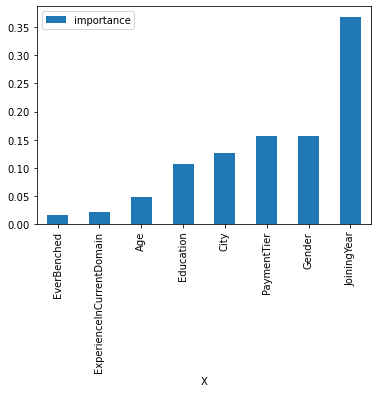

In [46]:
feature_imp = pd.DataFrame({'X':X.columns,'importance':RF.feature_importances_})
feature_imp.set_index('X').sort_values('importance').plot(kind='bar')

In [47]:
feature_imp

,X,importance
0,Education,0.107232
1,JoiningYear,0.369300
2,City,0.125909
3,PaymentTier,0.155891
4,Age,0.046975
5,Gender,0.157083
6,EverBenched,0.015936
7,ExperienceInCurrentDomain,0.021674


Education


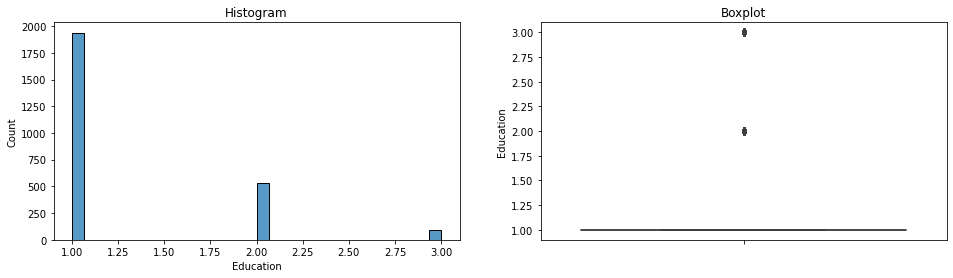

JoiningYear


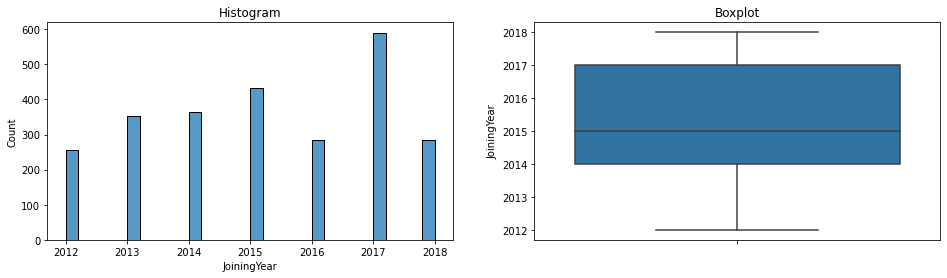

City


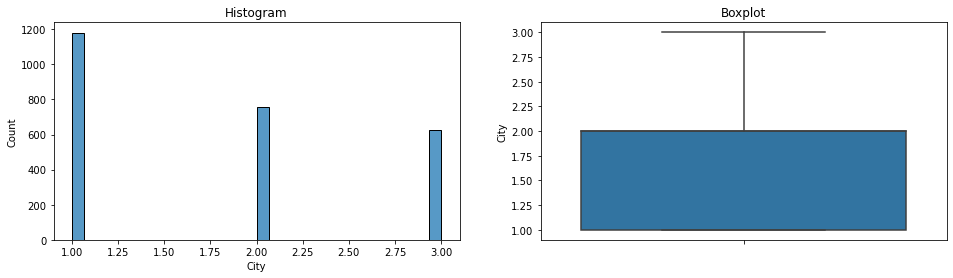

PaymentTier


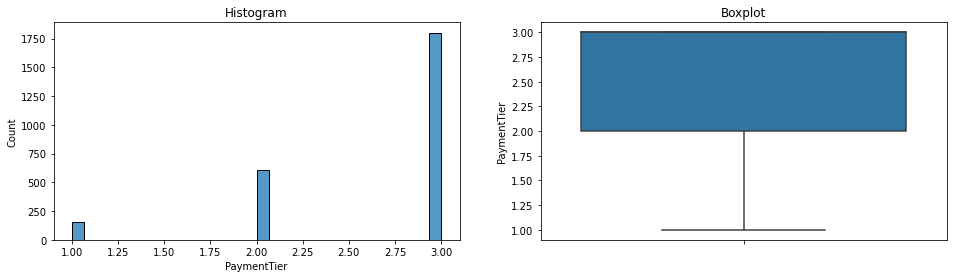

Age


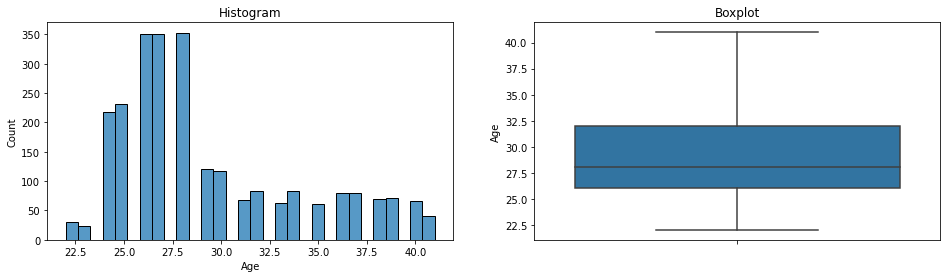

Gender


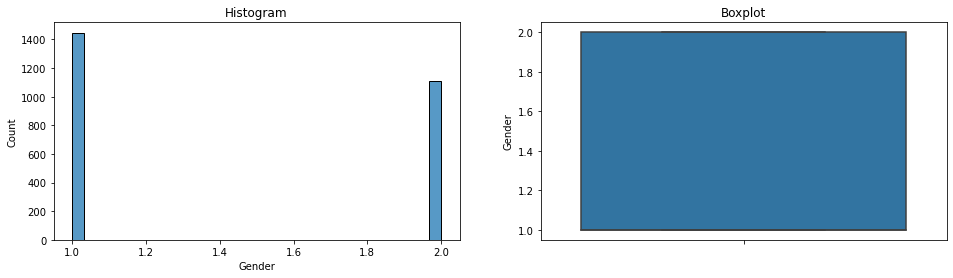

EverBenched


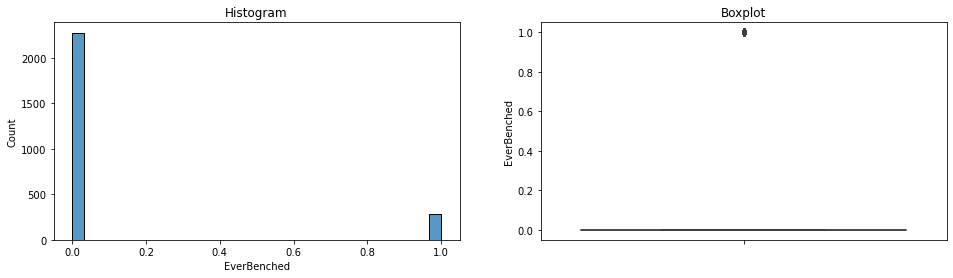

ExperienceInCurrentDomain


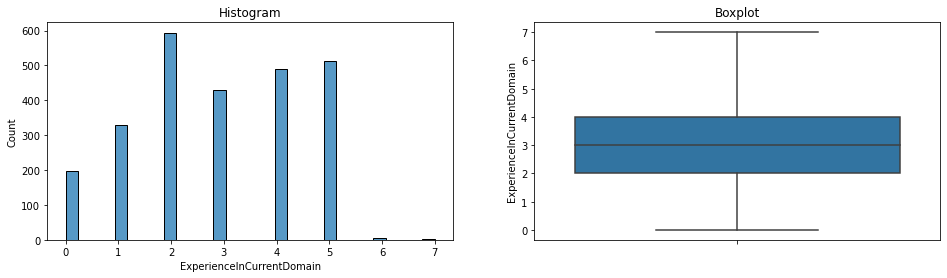

In [48]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in X_train_sample.columns:
  print (col)
  diagnostic_plots(X_train_sample, col)

Melihat dari hasil diagnosa analisis histogram, boxplot dan feature importance. Kami merasa tidak ada feature yang perlu dihapus. Semua feature yang ada dirasa masih related

## Modeling

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty="l2", C = 1, solver="lbfgs", max_iter = 1000)

logreg.fit(X_train_scaled,y_train_samp)

y_pred_train_lr = logreg.predict(X_train_scaled)
y_pred_test_lr = logreg.predict(X_test_scaled)

y_proba_train_lr = logreg.predict_proba(X_train_scaled)
y_proba_test_lr = logreg.predict_proba(X_test_scaled)

### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')

knn.fit(X_train_scaled,y_train_samp)

y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

y_proba_train_knn = knn.predict_proba(X_train_scaled)
y_proba_test_knn = knn.predict_proba(X_test_scaled)

### SVM

In [51]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, probability=True)

svm.fit(X_train_scaled,y_train_samp)

y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)

y_proba_train_svm = svm.predict_proba(X_train_scaled)
y_proba_test_svm = svm.predict_proba(X_test_scaled)

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=2, min_samples_leaf=1)

DT.fit(X_train_samp,y_train_samp)

y_pred_train_dt = DT.predict(X_train_samp)
y_pred_test_dt = DT.predict(X_test)

y_proba_train_dt = DT.predict_proba(X_train_samp)
y_proba_test_dt = DT.predict_proba(X_test)

### Ensemble Learning (Random Forest)

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

RF.fit(X_train_samp,y_train_samp)

y_pred_train_rf = RF.predict(X_train_samp)
y_pred_test_rf = RF.predict(X_test)

y_proba_train_rf = RF.predict_proba(X_train_samp)
y_proba_test_rf = RF.predict_proba(X_test)

### Native Bayes

In [54]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_samp, y_train_samp)

#Predict the response for test dataset
y_pred_train_nb = gnb.predict(X_train_samp)
y_pred_test_nb = gnb.predict(X_test)

y_proba_train_nb = gnb.predict_proba(X_train_samp)
y_proba_test_nb = gnb.predict_proba(X_test)

## Model Evaluation

- Akurasi
- Precision
- Recall
- F1 Score
- ROC AUC Score

In [55]:
from sklearn.metrics import classification_report, roc_auc_score

### Logistic Regression

In [56]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_lr))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_lr[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_lr))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_lr[:,1]))

Training
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1280
           1       0.65      0.63      0.64      1280

    accuracy                           0.64      2560
   macro avg       0.64      0.64      0.64      2560
weighted avg       0.64      0.64      0.64      2560

ROC AUC Score: 0.7020922851562501


Test
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       611
           1       0.51      0.62      0.56       320

    accuracy                           0.66       931
   macro avg       0.64      0.65      0.64       931
weighted avg       0.68      0.66      0.67       931

ROC AUC Score: 0.7054137684124386


### KNN

In [57]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_knn))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_knn[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_knn))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_knn[:,1]))

Training
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1280
           1       0.87      0.72      0.79      1280

    accuracy                           0.81      2560
   macro avg       0.82      0.81      0.81      2560
weighted avg       0.82      0.81      0.81      2560

ROC AUC Score: 0.8849728393554688


Test
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       611
           1       0.69      0.68      0.69       320

    accuracy                           0.79       931
   macro avg       0.76      0.76      0.76       931
weighted avg       0.79      0.79      0.79       931

ROC AUC Score: 0.8238006342062194


### SVM

In [58]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_svm))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_svm[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_svm))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_svm[:,1]))

Training
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1280
           1       0.87      0.72      0.79      1280

    accuracy                           0.80      2560
   macro avg       0.81      0.80      0.80      2560
weighted avg       0.81      0.80      0.80      2560

ROC AUC Score: 0.8517916870117187


Test
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       611
           1       0.70      0.66      0.68       320

    accuracy                           0.78       931
   macro avg       0.76      0.76      0.76       931
weighted avg       0.78      0.78      0.78       931

ROC AUC Score: 0.8111369680851065


### Decision Tree

In [59]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_dt))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_dt[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_dt))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_dt[:,1]))

Training
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1280
           1       0.81      0.74      0.77      1280

    accuracy                           0.78      2560
   macro avg       0.79      0.78      0.78      2560
weighted avg       0.79      0.78      0.78      2560

ROC AUC Score: 0.8545883178710938


Test
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       611
           1       0.65      0.74      0.69       320

    accuracy                           0.77       931
   macro avg       0.75      0.76      0.76       931
weighted avg       0.78      0.77      0.78       931

ROC AUC Score: 0.8377582855973814


### Random Forest

In [60]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_rf))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_rf[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_rf))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_rf[:,1]))

Training
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1280
           1       0.88      0.73      0.80      1280

    accuracy                           0.81      2560
   macro avg       0.82      0.81      0.81      2560
weighted avg       0.82      0.81      0.81      2560

ROC AUC Score: 0.8656369018554687


Test
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       611
           1       0.76      0.70      0.73       320

    accuracy                           0.82       931
   macro avg       0.80      0.79      0.79       931
weighted avg       0.82      0.82      0.82       931

ROC AUC Score: 0.8473532119476268


### Native Bayes

In [61]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_nb))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_nb[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_nb))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_nb[:,1]))

Training
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1280
           1       0.66      0.60      0.63      1280

    accuracy                           0.64      2560
   macro avg       0.64      0.64      0.64      2560
weighted avg       0.64      0.64      0.64      2560

ROC AUC Score: 0.6922357177734375


Test
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       611
           1       0.51      0.59      0.55       320

    accuracy                           0.66       931
   macro avg       0.64      0.64      0.64       931
weighted avg       0.68      0.66      0.67       931

ROC AUC Score: 0.6886073036006547


## Kesimpulan

Dari Mode Clasification yg ditest:
- Nilai Akurasi dari Model yang didapat <= 85%
- Model yang terbaik jika dilihat dari ROC AUC Score adalah Random Forest